In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [5]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [6]:
train_data.describe()

,id,label
count,1.500000e+05,150000.000000
mean,6.743533e+06,0.498847
std,2.919051e+06,0.500000
min,3.300000e+01,0.000000
25%,4.766881e+06,0.000000
50%,7.526840e+06,0.000000
75%,9.249435e+06,1.000000
max,1.027815e+07,1.000000


In [7]:
train_data[:3]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [8]:
test_data[:3]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [9]:
# 데이터 중복 확인 -> unique
train_data['document'].nunique(), train_data['label'].nunique() 

(146182, 2)

In [10]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [14]:
print(len(train_data))
print(train_data['label'].value_counts())

146183
0    73342
1    72841
Name: label, dtype: int64


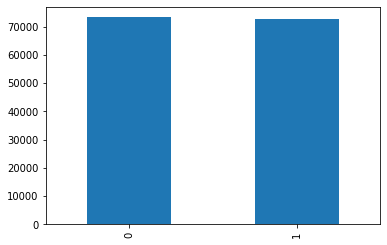

In [12]:
train_data['label'].value_counts().plot(kind='bar')

In [15]:
train_data['label'].isnull().sum()

0

In [17]:
train_data.document.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Name: document, Length: 146183, dtype: bool

In [18]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [19]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [ ]:
# 공백, 특수문자 제거
# re.sub(r'[^a-zA-Z]', '', text)
# ㄱ~ㅎ: U3131 ~ U314E
# ㅏ~ㅣ: ...
# 가~힣: U AC00 ~ D7A3


In [20]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
train_data[:5]

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1


In [22]:
train_data['document'].replace('', np.nan, inplace=True) # 아직도 걸리지 않았던 공백들 nan 값으로 변환
print(train_data.isnull().sum()) # nan값 제거

id            0
document    789
label         0
dtype: int64


C:\Users\student\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [25]:
train_data = train_data.dropna(how='any')

In [26]:
print(len(train_data))

145393


In [27]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
print("테스트 데이터:",len(test_data))

테스트 데이터: 48852


## Tokenizer

In [28]:
# stopwords -> 한국어의 조사 은, 는, 이, 가, 을, 를, 잘, 도...
stopwords=['의', '가', '이', '는', '은', '들', '잘', '좀', '과', '도', '을', '를', '으로', '한', '하다', '에']

In [29]:
from konlpy.tag import Okt
okt = Okt()

In [32]:
test_data['document'][0]

'굳ㅋ'

In [37]:
print(okt.morphs(test_data['document'][2], stem=True))

['뭐', '야', '이', '평점', '들', '은', '나쁘다', '않다', '만점', '짜다', '리', '는', '더', '더욱', '아니다']


In [ ]:
# 불용어 제거, 형태소 토큰화 작업
X_train = []
for sentence in train_data['document']:
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True) # Tokenizing
    temp_x = [word for word in temp_x if not word in stopwords]
    X_train.append(temp_x)
print(X_train[:5])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)
# token_size or vector_size

In [ ]:
threshold = 3 # 빈도수(3회미만 무시)
total_cnt = len(tokenizer.word_index)  # 단어수
rare_cnt = 0  # 빈도수가 threshold보다 작은 단어수
total_freq = 0 # 훈련 데이터 전체 단어 빈도수 총 합 
rate_freq = 0 # 빈도수가 threshold보다 작은 단어들의 총 합

# 단어와 빈도수의 pair를 key, value로 처리
for key, value in tokenizer.word_index.items():
    total_freq = total_freq + value
    
    # 단어 빈도수가 threshold보다 작은 값 처리
    if ( value < threshold):
        rare_cnt += 1
        rate_freq += value

In [ ]:
print('총 단어 수 (voabulary):', total_cnt)
print('빈도수 낮은 수:', rare_cnt)
print('단어 집합에서 빈도수 낮은 단어 비율:', ((rare_cnt / total_cnt) * 100) )
print('전체 출현 단어에서 빈도수가 낮은 단어 비율:', ((rate_freq / total_freq) * 100) )

vocab_size = total_cnt = rare_cnt + 1
print('단어 집합의 크기:', vocab_size)

In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(X_train[:3]) # [[150, 12, 434, 5, 454, ...]]

In [ ]:
Y_train = np.array(train_data['label'])
Y_test = np.array(test_data['label'])

In [ ]:
# 빈 샘플 데이터 제거

In [ ]:
# 패딩 처리
# 최대 리뷰 길이, 평균 리뷰 길이 구하기
max_review_length = max(len(x) for x in X_train)
print("최대 리뷰 길이: ", max_review_length)

# ave, mean...
mean_review_length = sum(map(len, X_train)) / len(X_train)
print("평균 리뷰 길이: ", mean_review_length)
plt.hist((len(s) for s in X_train), bins=50)
plt.xlabel('length of samples')
plt.ylabel('length of samples')

In [ ]:
max_length = 30
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

## LSTM을 이용한 리뷰 모델 생성


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
T = X_train.shape[1] # 30
i = Input(shape=(T,))
x = Embedding(V,D)(i)
x = LSTM(128)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.summary()

In [ ]:
eStop = EarlyStopping(monito='val_loss', mode='min', verbose=1, patience=5)
mCheck = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics-['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=10, validation_split=0.2,
         batch_size=60, callbacks=[eStop, mCheck])

In [ ]:
print("테스트 정확도: ",model.evaluate(X_test, Y_test)[1])